In [211]:
import pm4py
print(pm4py.__version__)

1.2.11


In [212]:
# paths are filtered before activities
custom_path_range =  [(0, 0.15), (0.9, 1)]

# percentage of the activities filtered in the first stage
custom_activitiy_range = [(0,0.0), (0,1)]

# name of the input log
input_file = "/home/max/Downloads/Sepsis Cases - Event Log.xes"

In [213]:
# importing a XES log as an 'EventLog' object
from pm4py.objects.log.importer.xes import factory as xes_importer
log = xes_importer.apply(input_file)

In [215]:
str(custom_path_range)

'[(0, 0.15), (0.9, 1)]'

In [216]:
print(log)

[{'attributes': {'variant': 'Variant 1', 'variant-index': 1, 'creator': 'Fluxicon Disco', 'concept:name': '192'}, 'events': [{'Activity': 'Complaint received', 'org:resource': 'NOT_SET', 'concept:name': 'Complaint received', 'lifecycle:transition': 'complete', 'time:timestamp': datetime.datetime(2020, 3, 5, 13, 12, tzinfo=datetime.timezone(datetime.timedelta(seconds=3600)))}, '..', {'Activity': 'Complaint addressed', 'org:resource': 'NOT_SET', 'concept:name': 'Complaint addressed', 'lifecycle:transition': 'complete', 'time:timestamp': datetime.datetime(2020, 3, 24, 17, 26, tzinfo=datetime.timezone(datetime.timedelta(seconds=3600)))}]}, '....', {'attributes': {'variant': 'Variant 1', 'variant-index': 1, 'creator': 'Fluxicon Disco', 'concept:name': '686'}, 'events': [{'Activity': 'Complaint received', 'org:resource': 'NOT_SET', 'concept:name': 'Complaint received', 'lifecycle:transition': 'complete', 'time:timestamp': datetime.datetime(2020, 3, 6, 13, 26, tzinfo=datetime.timezone(datetim

In [217]:
# get all variants (i.e., paths)
from pm4py.algo.filtering.log.variants import variants_filter
variants = variants_filter.get_variants(log)

In [218]:
from pm4py.statistics.traces.log import case_statistics
variants_count = case_statistics.get_variant_statistics(log)
variants_count = sorted(variants_count, key=lambda x: x['count'], reverse=False)
variants_count

[{'variant': 'Complaint received,Send automatic reply to customer,Discuss solution,Send apology,Propose solution,Negative response received,Evaluate acceptable alternative,Discuss solution,Send apology,Propose solution,Negative response received,Evaluate acceptable alternative,Discuss solution,Send apology,Propose solution,Negative response received,Evaluate acceptable alternative,Go to court,Complaint not addressed',
  'count': 2},
 {'variant': 'Complaint received,Send automatic reply to customer,Discuss solution,Send apology,Propose solution,Negative response received,Evaluate acceptable alternative,Discuss solution,Send apology,Propose solution,Negative response received,Evaluate acceptable alternative,Discuss solution,Send apology,Propose solution,Negative response received,Evaluate acceptable alternative,Discuss solution,Send apology,Propose solution,Positive response received,Execute solution,Complaint addressed',
  'count': 2},
 {'variant': 'Complaint received,Send automatic rep

In [219]:
custom_path_range = sorted(custom_path_range, reverse=False)

# check overlapping
for i in range(0,len(custom_path_range)-1):
    if(custom_path_range[i][1] > custom_path_range[i+1][0]):
        print("THROW EXCEPTION: Overlapping range")

nr_variants = len(variants_count)
nr_variants
custom_path_range * nr_variants

idx = [(round(x*nr_variants), round(y*nr_variants)) for (x,y) in custom_path_range]

idx

[(0, 1), (6, 7)]

In [220]:
flatten = lambda l: [item for sublist in l for item in sublist]

In [221]:
variants_subset = [variants_count[x:y+1] for (x,y) in idx]
#variants_subset = list(variants_subset)
variants_subset = flatten(variants_subset)
variants_subset

[{'variant': 'Complaint received,Send automatic reply to customer,Discuss solution,Send apology,Propose solution,Negative response received,Evaluate acceptable alternative,Discuss solution,Send apology,Propose solution,Negative response received,Evaluate acceptable alternative,Discuss solution,Send apology,Propose solution,Negative response received,Evaluate acceptable alternative,Go to court,Complaint not addressed',
  'count': 2},
 {'variant': 'Complaint received,Send automatic reply to customer,Discuss solution,Send apology,Propose solution,Negative response received,Evaluate acceptable alternative,Discuss solution,Send apology,Propose solution,Negative response received,Evaluate acceptable alternative,Discuss solution,Send apology,Propose solution,Negative response received,Evaluate acceptable alternative,Discuss solution,Send apology,Propose solution,Positive response received,Execute solution,Complaint addressed',
  'count': 2},
 {'variant': 'Complaint received,Send automatic rep

In [222]:
filtered_variants = {k:v for k,v in variants.items() if k in [x["variant"] for x in variants_subset]}
filtered_variants

{'Complaint received,Send automatic reply to customer,Discuss solution,Send apology,Propose solution,Positive response received,Execute solution,Complaint addressed': [{'attributes': {'variant': 'Variant 1', 'variant-index': 1, 'creator': 'Fluxicon Disco', 'concept:name': '192'}, 'events': [{'Activity': 'Complaint received', 'org:resource': 'NOT_SET', 'concept:name': 'Complaint received', 'lifecycle:transition': 'complete', 'time:timestamp': datetime.datetime(2020, 3, 5, 13, 12, tzinfo=datetime.timezone(datetime.timedelta(seconds=3600)))}, '..', {'Activity': 'Complaint addressed', 'org:resource': 'NOT_SET', 'concept:name': 'Complaint addressed', 'lifecycle:transition': 'complete', 'time:timestamp': datetime.datetime(2020, 3, 24, 17, 26, tzinfo=datetime.timezone(datetime.timedelta(seconds=3600)))}]},
  {'attributes': {'variant': 'Variant 1', 'variant-index': 1, 'creator': 'Fluxicon Disco', 'concept:name': '190'}, 'events': [{'Activity': 'Complaint received', 'org:resource': 'NOT_SET', '

In [223]:
filtered_log = variants_filter.apply(log, filtered_variants)
len(filtered_log)

811

In [224]:
# get all variants (i.e., paths)
variants = variants_filter.get_variants(filtered_log)

In [225]:
variants_count = case_statistics.get_variant_statistics(filtered_log)
variants_count = sorted(variants_count, key=lambda x: x['count'], reverse=False)
len(variants_count)

3

In [226]:
activities = dict()
for variant in variants_count:
    for activity in variant["variant"].split(","):
        if (activity not in activities.keys()):
            activities[activity] = variant["count"]
        else:
            activities[activity] += variant["count"]


sorted_activities = {k: v for k, v in sorted(activities.items(), key=lambda item: item[1])}
sorted_activities

{'Go to court': 2,
 'Complaint not addressed': 2,
 'Negative response received': 12,
 'Evaluate acceptable alternative': 12,
 'Positive response received': 809,
 'Execute solution': 809,
 'Complaint addressed': 809,
 'Complaint received': 811,
 'Send automatic reply to customer': 811,
 'Discuss solution': 821,
 'Send apology': 821,
 'Propose solution': 821}

In [227]:
activities_sorted_list = list(sorted_activities)
activities_sorted_list

['Go to court',
 'Complaint not addressed',
 'Negative response received',
 'Evaluate acceptable alternative',
 'Positive response received',
 'Execute solution',
 'Complaint addressed',
 'Complaint received',
 'Send automatic reply to customer',
 'Discuss solution',
 'Send apology',
 'Propose solution']

In [228]:
custom_activitiy_range = sorted(custom_activitiy_range, reverse=False)

# check overlapping
for i in range(0,len(custom_activitiy_range)-1):
    if(custom_activitiy_range[i][1] > custom_activitiy_range[i+1][0]):
        print("THROW EXCEPTION: Overlapping range")

In [229]:
# select the activities
nr_activities = len(activities_sorted_list)
nr_activities

idx = [(round(x*nr_activities), round(y*nr_activities)) for (x,y) in custom_activitiy_range]

idx

[(0, 0), (0, 12)]

In [230]:
activities_to_keep = [activities_sorted_list[x:y+1] for (x,y) in idx]
activities_to_keep = flatten(activities_to_keep)
activities_to_keep

['Go to court',
 'Go to court',
 'Complaint not addressed',
 'Negative response received',
 'Evaluate acceptable alternative',
 'Positive response received',
 'Execute solution',
 'Complaint addressed',
 'Complaint received',
 'Send automatic reply to customer',
 'Discuss solution',
 'Send apology',
 'Propose solution']

In [231]:
variants_idx = []

for i in range(len(variants_count)):
    for activity in activities_to_keep:
        if (activity in variants_count[i]["variant"].split(",") and (i not in variants_idx)):
            variants_idx.append(i)
            
variants_idx

[0, 1, 2]

In [232]:
variants_subset = [variants_count[i] for i in variants_idx]
variants_subset

[{'variant': 'Complaint received,Send automatic reply to customer,Discuss solution,Send apology,Propose solution,Negative response received,Evaluate acceptable alternative,Discuss solution,Send apology,Propose solution,Negative response received,Evaluate acceptable alternative,Discuss solution,Send apology,Propose solution,Negative response received,Evaluate acceptable alternative,Go to court,Complaint not addressed',
  'count': 2},
 {'variant': 'Complaint received,Send automatic reply to customer,Discuss solution,Send apology,Propose solution,Negative response received,Evaluate acceptable alternative,Discuss solution,Send apology,Propose solution,Negative response received,Evaluate acceptable alternative,Discuss solution,Send apology,Propose solution,Negative response received,Evaluate acceptable alternative,Discuss solution,Send apology,Propose solution,Positive response received,Execute solution,Complaint addressed',
  'count': 2},
 {'variant': 'Complaint received,Send automatic rep

In [233]:
filtered_variants = {k:v for k,v in variants.items() if k in [x["variant"] for x in variants_subset]}
filtered_variants

{'Complaint received,Send automatic reply to customer,Discuss solution,Send apology,Propose solution,Positive response received,Execute solution,Complaint addressed': [{'attributes': {'variant': 'Variant 1', 'variant-index': 1, 'creator': 'Fluxicon Disco', 'concept:name': '192'}, 'events': [{'Activity': 'Complaint received', 'org:resource': 'NOT_SET', 'concept:name': 'Complaint received', 'lifecycle:transition': 'complete', 'time:timestamp': datetime.datetime(2020, 3, 5, 13, 12, tzinfo=datetime.timezone(datetime.timedelta(seconds=3600)))}, '..', {'Activity': 'Complaint addressed', 'org:resource': 'NOT_SET', 'concept:name': 'Complaint addressed', 'lifecycle:transition': 'complete', 'time:timestamp': datetime.datetime(2020, 3, 24, 17, 26, tzinfo=datetime.timezone(datetime.timedelta(seconds=3600)))}]},
  {'attributes': {'variant': 'Variant 1', 'variant-index': 1, 'creator': 'Fluxicon Disco', 'concept:name': '190'}, 'events': [{'Activity': 'Complaint received', 'org:resource': 'NOT_SET', '

In [234]:
filtered_log = variants_filter.apply(filtered_log, filtered_variants)
filtered_log

[{'attributes': {'variant': 'Variant 1', 'variant-index': 1, 'creator': 'Fluxicon Disco', 'concept:name': '192'}, 'events': [{'Activity': 'Complaint received', 'org:resource': 'NOT_SET', 'concept:name': 'Complaint received', 'lifecycle:transition': 'complete', 'time:timestamp': datetime.datetime(2020, 3, 5, 13, 12, tzinfo=datetime.timezone(datetime.timedelta(seconds=3600)))}, '..', {'Activity': 'Complaint addressed', 'org:resource': 'NOT_SET', 'concept:name': 'Complaint addressed', 'lifecycle:transition': 'complete', 'time:timestamp': datetime.datetime(2020, 3, 24, 17, 26, tzinfo=datetime.timezone(datetime.timedelta(seconds=3600)))}]}, '....', {'attributes': {'variant': 'Variant 7', 'variant-index': 7, 'creator': 'Fluxicon Disco', 'concept:name': '99'}, 'events': [{'Activity': 'Complaint received', 'org:resource': 'NOT_SET', 'concept:name': 'Complaint received', 'lifecycle:transition': 'complete', 'time:timestamp': datetime.datetime(2020, 3, 5, 11, 39, tzinfo=datetime.timezone(datetime

In [235]:
# filtered_log[0][0]

In [236]:
new_log = pm4py.objects.log.log.EventLog()
for trace in filtered_log:
    new_trace = pm4py.objects.log.log.Trace()
    for event in trace:
        if(event['concept:name'] in activities_to_keep):
            new_trace.append(event)
    if(len(new_trace)>0):
        new_log.append(new_trace)
    
new_log            

[{'attributes': {}, 'events': [{'Activity': 'Complaint received', 'org:resource': 'NOT_SET', 'concept:name': 'Complaint received', 'lifecycle:transition': 'complete', 'time:timestamp': datetime.datetime(2020, 3, 5, 13, 12, tzinfo=datetime.timezone(datetime.timedelta(seconds=3600)))}, '..', {'Activity': 'Complaint addressed', 'org:resource': 'NOT_SET', 'concept:name': 'Complaint addressed', 'lifecycle:transition': 'complete', 'time:timestamp': datetime.datetime(2020, 3, 24, 17, 26, tzinfo=datetime.timezone(datetime.timedelta(seconds=3600)))}]}, '....', {'attributes': {}, 'events': [{'Activity': 'Complaint received', 'org:resource': 'NOT_SET', 'concept:name': 'Complaint received', 'lifecycle:transition': 'complete', 'time:timestamp': datetime.datetime(2020, 3, 5, 11, 39, tzinfo=datetime.timezone(datetime.timedelta(seconds=3600)))}, '..', {'Activity': 'Complaint not addressed', 'org:resource': 'NOT_SET', 'concept:name': 'Complaint not addressed', 'lifecycle:transition': 'complete', 'time:

In [ ]:
used_paths = 0
for lower, higher in custom_path_range:
    used_paths += round((higher-lower)*100)
    
print(f"Using {used_paths}% of paths. {100-used_paths}% of paths are discarded.")

In [ ]:
used_activities = 0
for lower, higher in custom_activity_range:
    used_activities += round((higher-lower)*100)
    
print(f"Using {used_activities}% of activities in remaining paths. {100-used_activities}% of activities are discarded.")

In [237]:
# apply a discovery algorithm (IMDFb) to the EventLog object
from pm4py.algo.discovery.inductive import factory as inductive_miner
# discovers an accepting Petri net
net, im, fm = inductive_miner.apply(new_log)

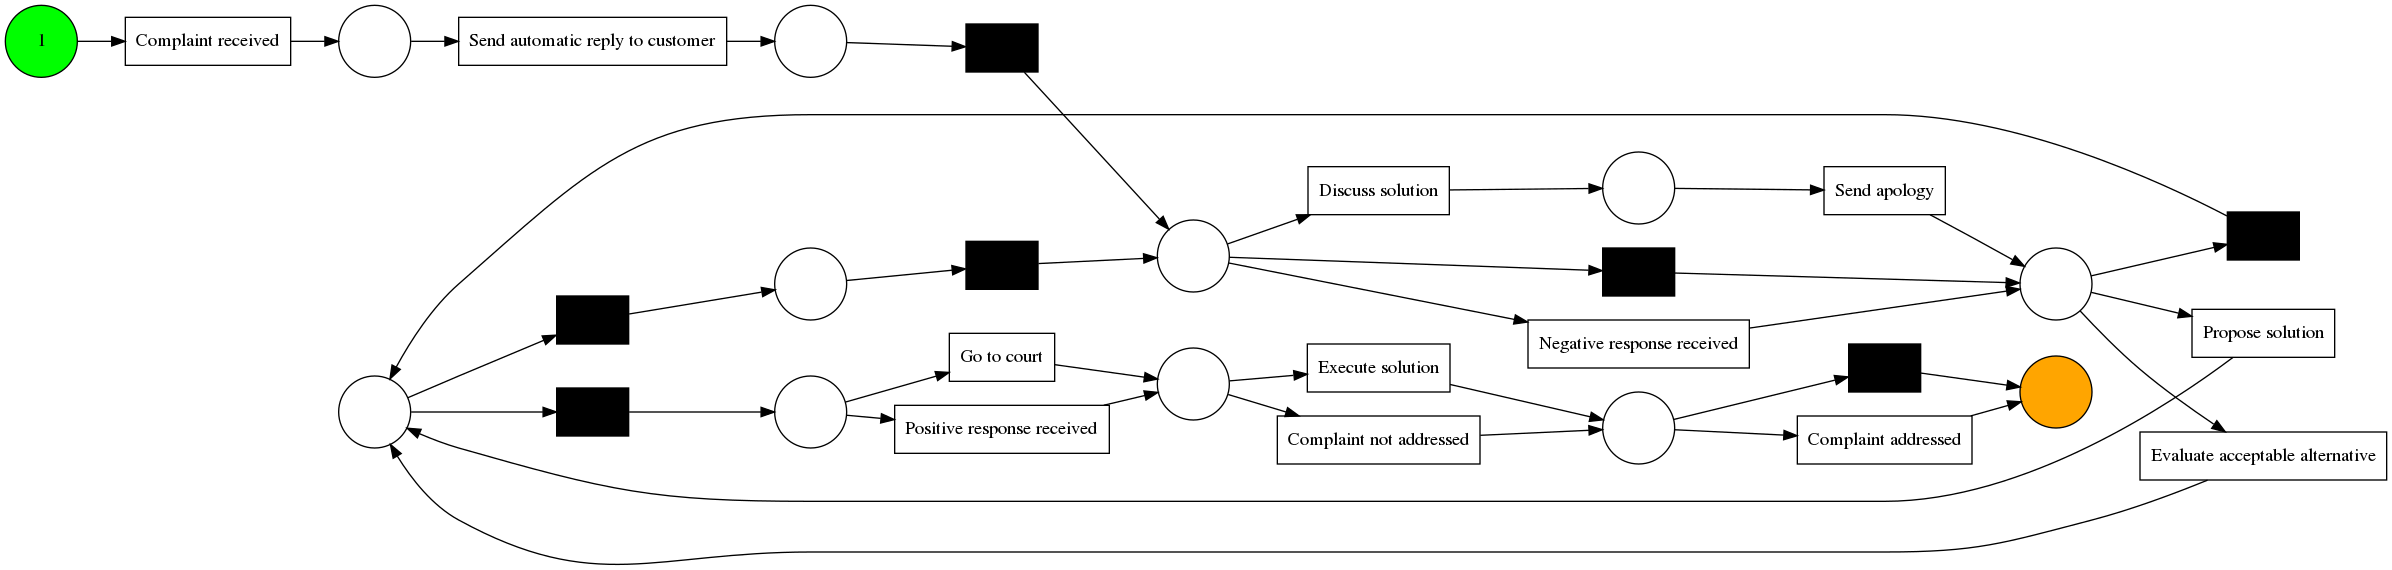

In [238]:
# perform a visualization of the Petri net that is discovered
from pm4py.visualization.petrinet import factory as pn_vis_factory
gviz = pn_vis_factory.apply(net, im, fm)
from pm4py.objects.petri.exporter import pnml as pnml_exporter

pn_vis_factory.view(gviz)

In [239]:
from pm4py.objects.petri.exporter import pnml as pnml_exporter
pnml_exporter.export_net(net, im, "petri_final.pnml", final_marking=fm)

/home/max/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated function export_net.
  


In [240]:
pn_vis_factory.save(gviz, "model.png")

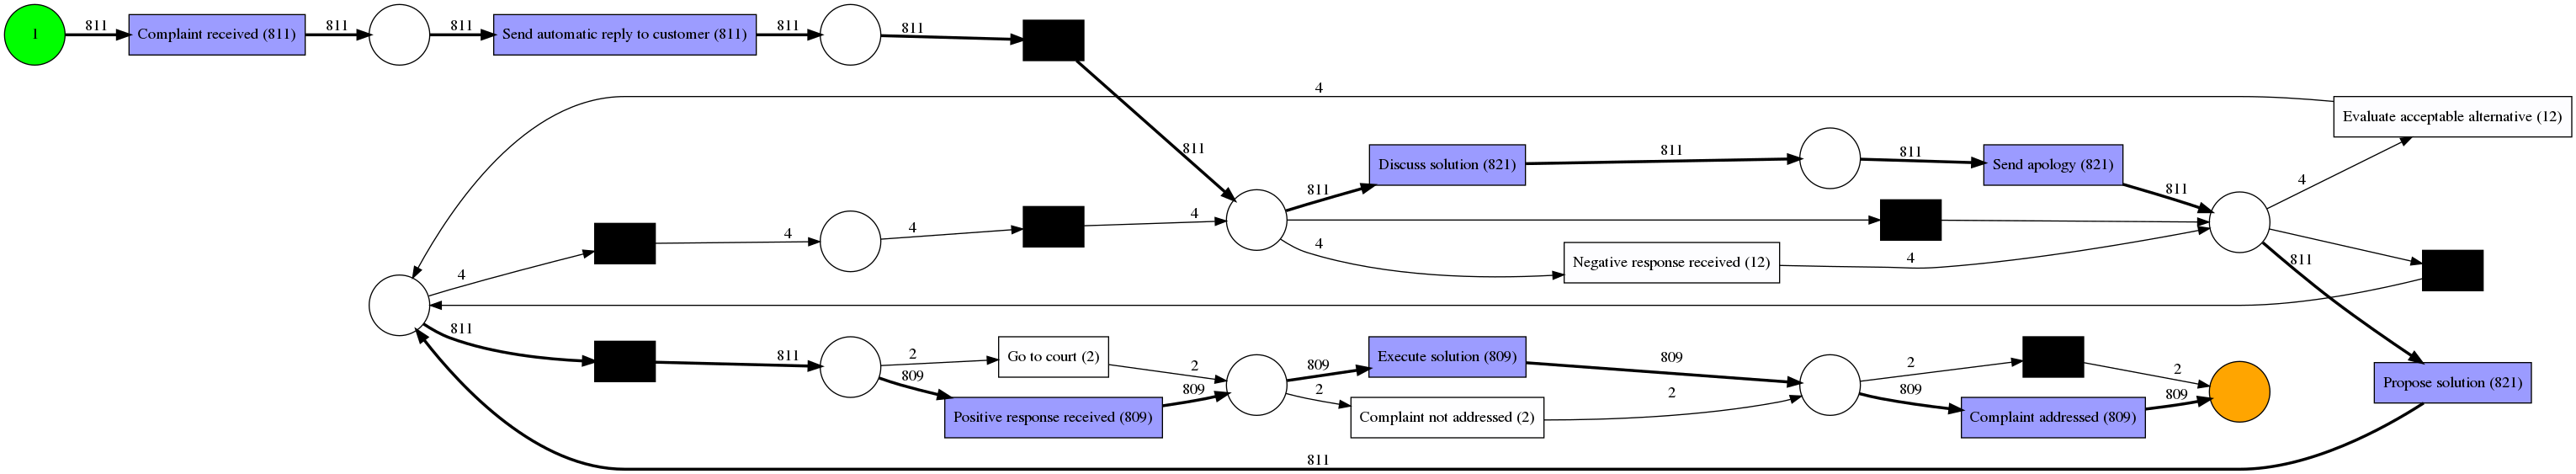

In [241]:
# perform a visualization of the Petri net that is discovered
from pm4py.visualization.petrinet import factory as pn_vis_factory
gviz = pn_vis_factory.apply(net, im, fm, variant="frequency", log=new_log)
pn_vis_factory.view(gviz)

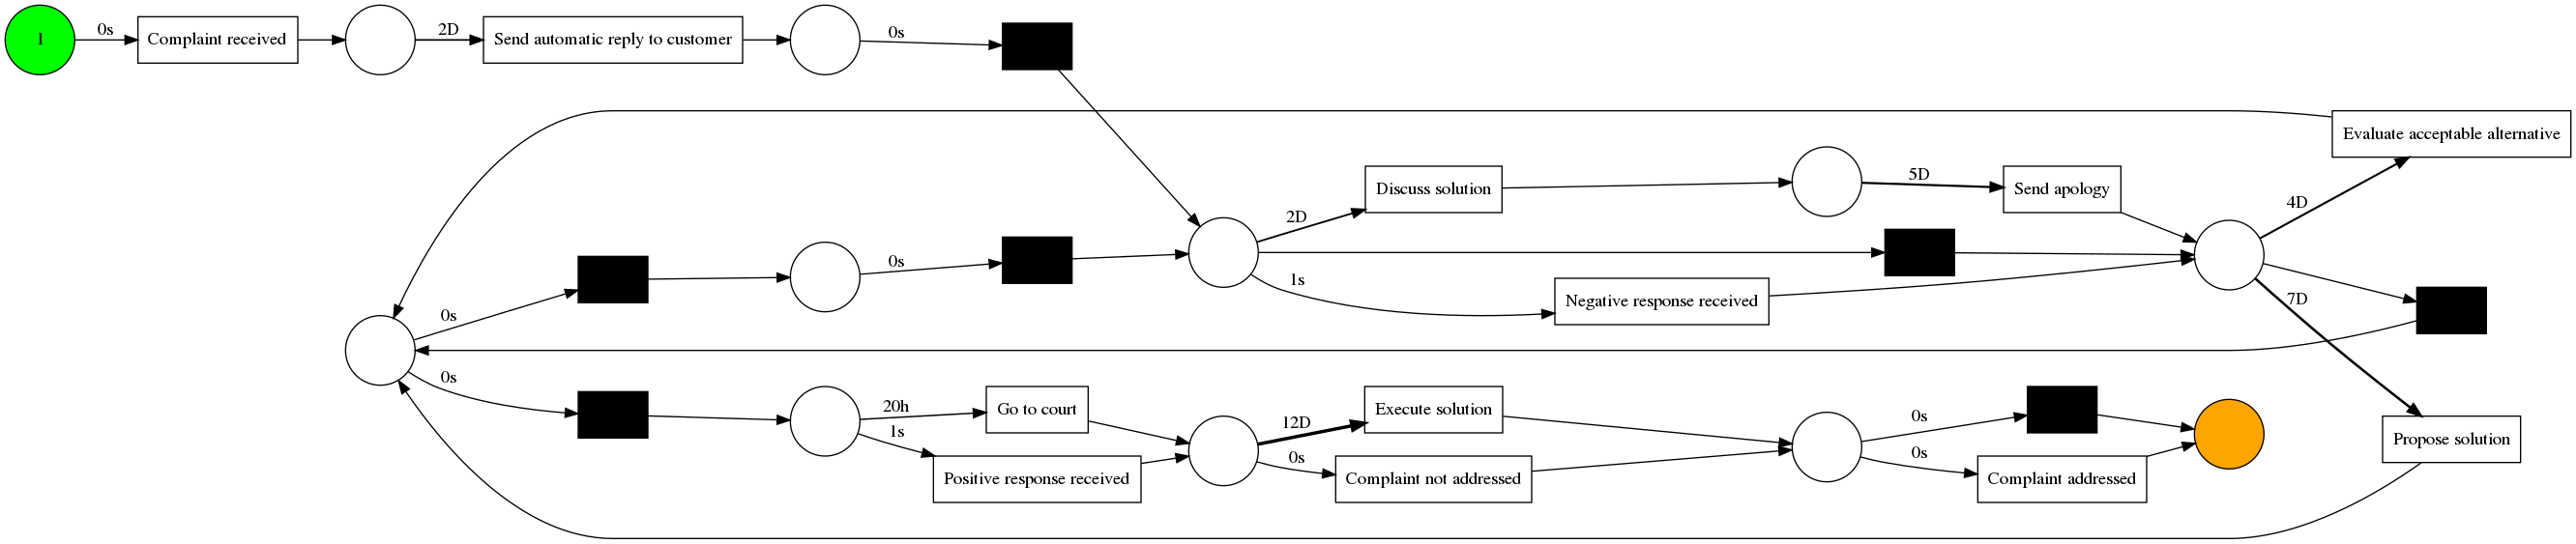

In [242]:
# perform a visualization of the Petri net that is discovered (PERFORMANCE!)
from pm4py.visualization.petrinet import factory as pn_vis_factory
gviz = pn_vis_factory.apply(net, im, fm, variant="performance", log=new_log)
pn_vis_factory.view(gviz)

In [243]:
# heuristic miner
from pm4py.algo.discovery.heuristics import factory as heuristics_miner
heu_net = heuristics_miner.apply_heu(new_log, parameters={"dependency_thresh": 0.99})

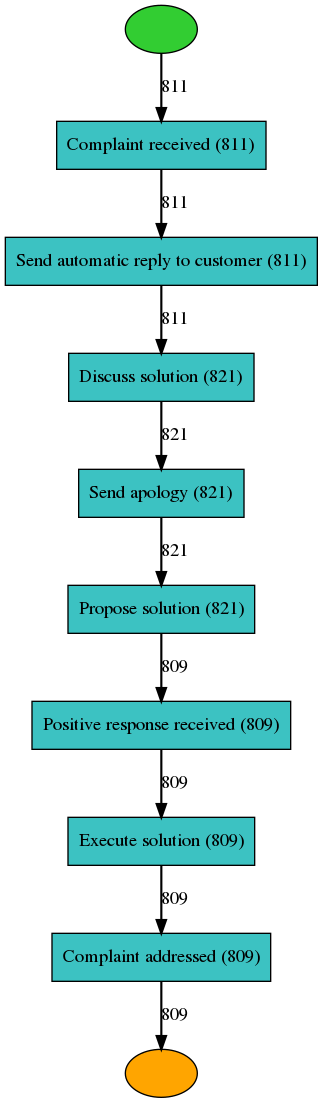

In [244]:
# visualize network
from pm4py.visualization.heuristics_net import factory as hn_vis_factory
gviz = hn_vis_factory.apply(heu_net)
hn_vis_factory.view(gviz)

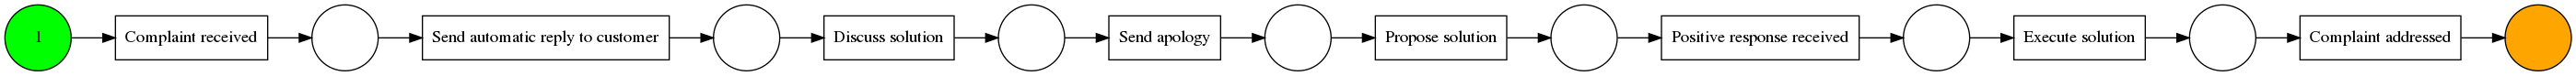

In [245]:
# Petri net
from pm4py.algo.discovery.heuristics import factory as heuristics_miner
net, im, fm = heuristics_miner.apply(new_log, parameters={"dependency_thresh": 0.99})

from pm4py.visualization.petrinet import factory as pn_vis_factory
gviz = pn_vis_factory.apply(net, im, fm)
pn_vis_factory.view(gviz)